inf
0.0
1053
0.000949667616334283
inf
0.0
17014
5.877512636652169e-05
inf
0.0
14415
6.937218175511619e-05
inf
0.0
17200
5.8139534883720933e-05
inf
0.0
37
0.02702702702702703
inf
0.0
1204
0.0008305647840531562
inf
0.0
30
0.03333333333333333
inf
0.0
1173
0.0008525149190110827
inf
0.0
37
0.02702702702702703
inf
0.0
15583
6.417249566835655e-05
inf
0.0
14779
6.766357669666418e-05
inf
0.0
145
0.006896551724137931
inf
0.0
17544
5.699954400364797e-05
inf
0.0
17378
5.7544021176199794e-05
inf
0.0
7
0.14285714285714285
inf
0.0
100
0.01
inf
0.0
92
0.010869565217391304
inf
0.0
355
0.0028169014084507044
inf
0.0
324
0.0030864197530864196
inf
0.0
1990
0.0005025125628140704
inf
0.0
43
0.023255813953488372
inf
0.0
1938
0.0005159958720330237
inf
0.0
74
0.013513513513513514
inf
0.0
11563
8.648274669203493e-05
inf
0.0
53
0.018867924528301886
inf
0.0
168
0.005952380952380952
inf
0.0
153
0.006535947712418301
inf
0.0
947
0.0010559662090813093
inf
0.0
9270
0.00010787486515641856
inf
0.0
8940
0.0001118568232662

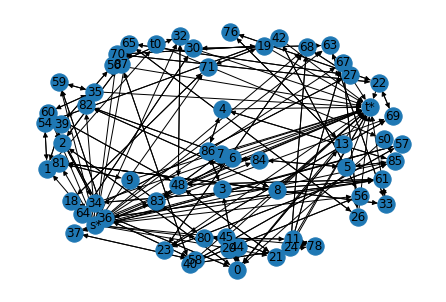

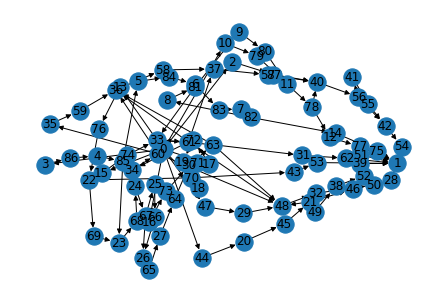

In [1]:
# IMPORT
import sys
import parse_graph_new
import path_enumeration
import pairedbin_enumeration
import networkx as nx
import time
import matplotlib.pyplot as plt
from copy import deepcopy 
import optimize
from flowProblem import writeGStar

# VARIABLES
start = time.time()
no_trans = 0
#gene_id = 0
#file_gtf = open("transcripts.gtf", "w") 

# MAIN
with open('test6.graph') as f:
    fileEndReached = False
    f.readline() #skip ---- seperator line
    while not fileEndReached: 
        
        # READ META AND BIN DATA FROM FILE
        f.readline() #skip ==META 
        Chromosome, Strand, Exons = parse_graph_new.parse_meta(f)
        Bins = parse_graph_new.parse_bins(f)
        PairedBins = parse_graph_new.parse_pairs(f)
        PairedBins_copy = deepcopy(PairedBins)

        # BUILD GRAPH
        G_full = nx.DiGraph()
        fileEndReached, skip = parse_graph_new.parse_graph(f, G_full, Exons)

        if not fileEndReached and not skip:
            G_clean = nx.DiGraph()
            fileEndReached, _ = parse_graph_new.parse_graph(f, G_clean, Exons)
            # nx.draw_networkx(G_clean, with_labels=True, arrowsize=12)
            # plt.show()
        if skip:
            G_clean = G_full

        transcripts = []
        # FULL PATH ENUMERATION
        """
        transcripts = path_enumeration.enumeration(G_full,[],"0",["0"],"1",True)
        no_trans = no_trans + len(transcripts)
        """
        
        # MULTI BIN ENUMERATION
        """
        multi_bins = path_enumeration.get_multibins(Bins)
        transcripts = path_enumeration.enumeration_bins2(G_clean,[],"0",["0"],[],multi_bins,"1",True)
        no_trans = no_trans + len(transcripts)
        """
        
        # PAIRED BIN ENUMERATION 1
        """
        multi_bins = path_enumeration.get_multibins(Bins)
        paired_bins = pairedbin_enumeration.get_pairedbins(G_clean,PairedBins_copy,multi_bins)
        transcripts = path_enumeration.enumeration_bins2(G_clean,[],"0",["0"],[],paired_bins+multi_bins,"1",True)
        no_trans = no_trans + len(transcripts)
        """
        
        # PAIRED BIN ENUMERATION 2
        """
        pairedbins_grouped = pairedbin_enumeration.group_pairs(PairedBins_copy)
        multi_bins = path_enumeration.get_multibins(Bins)
        transcripts = path_enumeration.enumeration_bins2(G_clean,[],"0",["0"],[],multi_bins,"1",True)
        transcripts_copy = deepcopy(transcripts)
        filtered_transcripts = pairedbin_enumeration.filter_transcripts(transcripts_copy,pairedbins_grouped)
        no_trans = no_trans + len(filtered_transcripts)
        """
        
        # ADD TRANSCRIPTS TO GTF FILE
        """
        gene_id += 1
        transcript_id = 0
        for transcript in transcripts:
            transcript_id += 1
            parse_graph_new.write_valid_gtf_entry(file_gtf,Chromosome,Strand,Exons,transcript,"Gene"+str(gene_id),"Transcript"+str(transcript_id))
        """
    
        # Optimization 
        """
        transcripts = path_enumeration.enumeration(G_clean, [], "0", ["0"], "1", False)
        print(optimize.model(G_clean, transcripts))
        #get dictionary with expression levels (F=(f1,f2,f3,...fN))
        var_dict = optimize.model(G_clean, transcripts)
        """

        # Flow Decomposition

        g_Star = writeGStar(G_clean, 1)
        plt.figure(1)
        nx.draw(g_Star, with_labels=True)
        plt.figure(2)
        nx.draw(G_full, with_labels=True)
        

    # PRINT RESULTS  
    end = time.time()
    print("Gesamtanzahl Transkripte: ", no_trans)
    print('{:5.3f}s'.format(end-start))       
    #file_gtf.close()
